Introduction
Name : Alaa Mohammed Rehab

Group Code : DEPI_GHR2_AIS4_S2

Project Objective : Student Performance Insights.

Challenge Description:

The goal of this competition is to analyze student performance data and uncover insights that can help improve academic outcomes. Students are required to clean the data, analyze trends, visualize findings, and derive actionable insights.

Implementation in Steps :

Step 1: Load the dataset and explore its structure.
Step 2: Handle missing values and perform basic data cleaning.
Step 3: Conduct exploratory data analysis (EDA) using visualizations.
Step 4: Identify correlations and patterns in student performance.
Step 5: Present findings in a well-structured report.

# **About Dataset**
#### Student Performance & Behavior Dataset
This dataset is real data of 5,000 records collected from a private learning provider. The dataset includes key attributes necessary for exploring patterns, correlations, and insights related to academic performance.
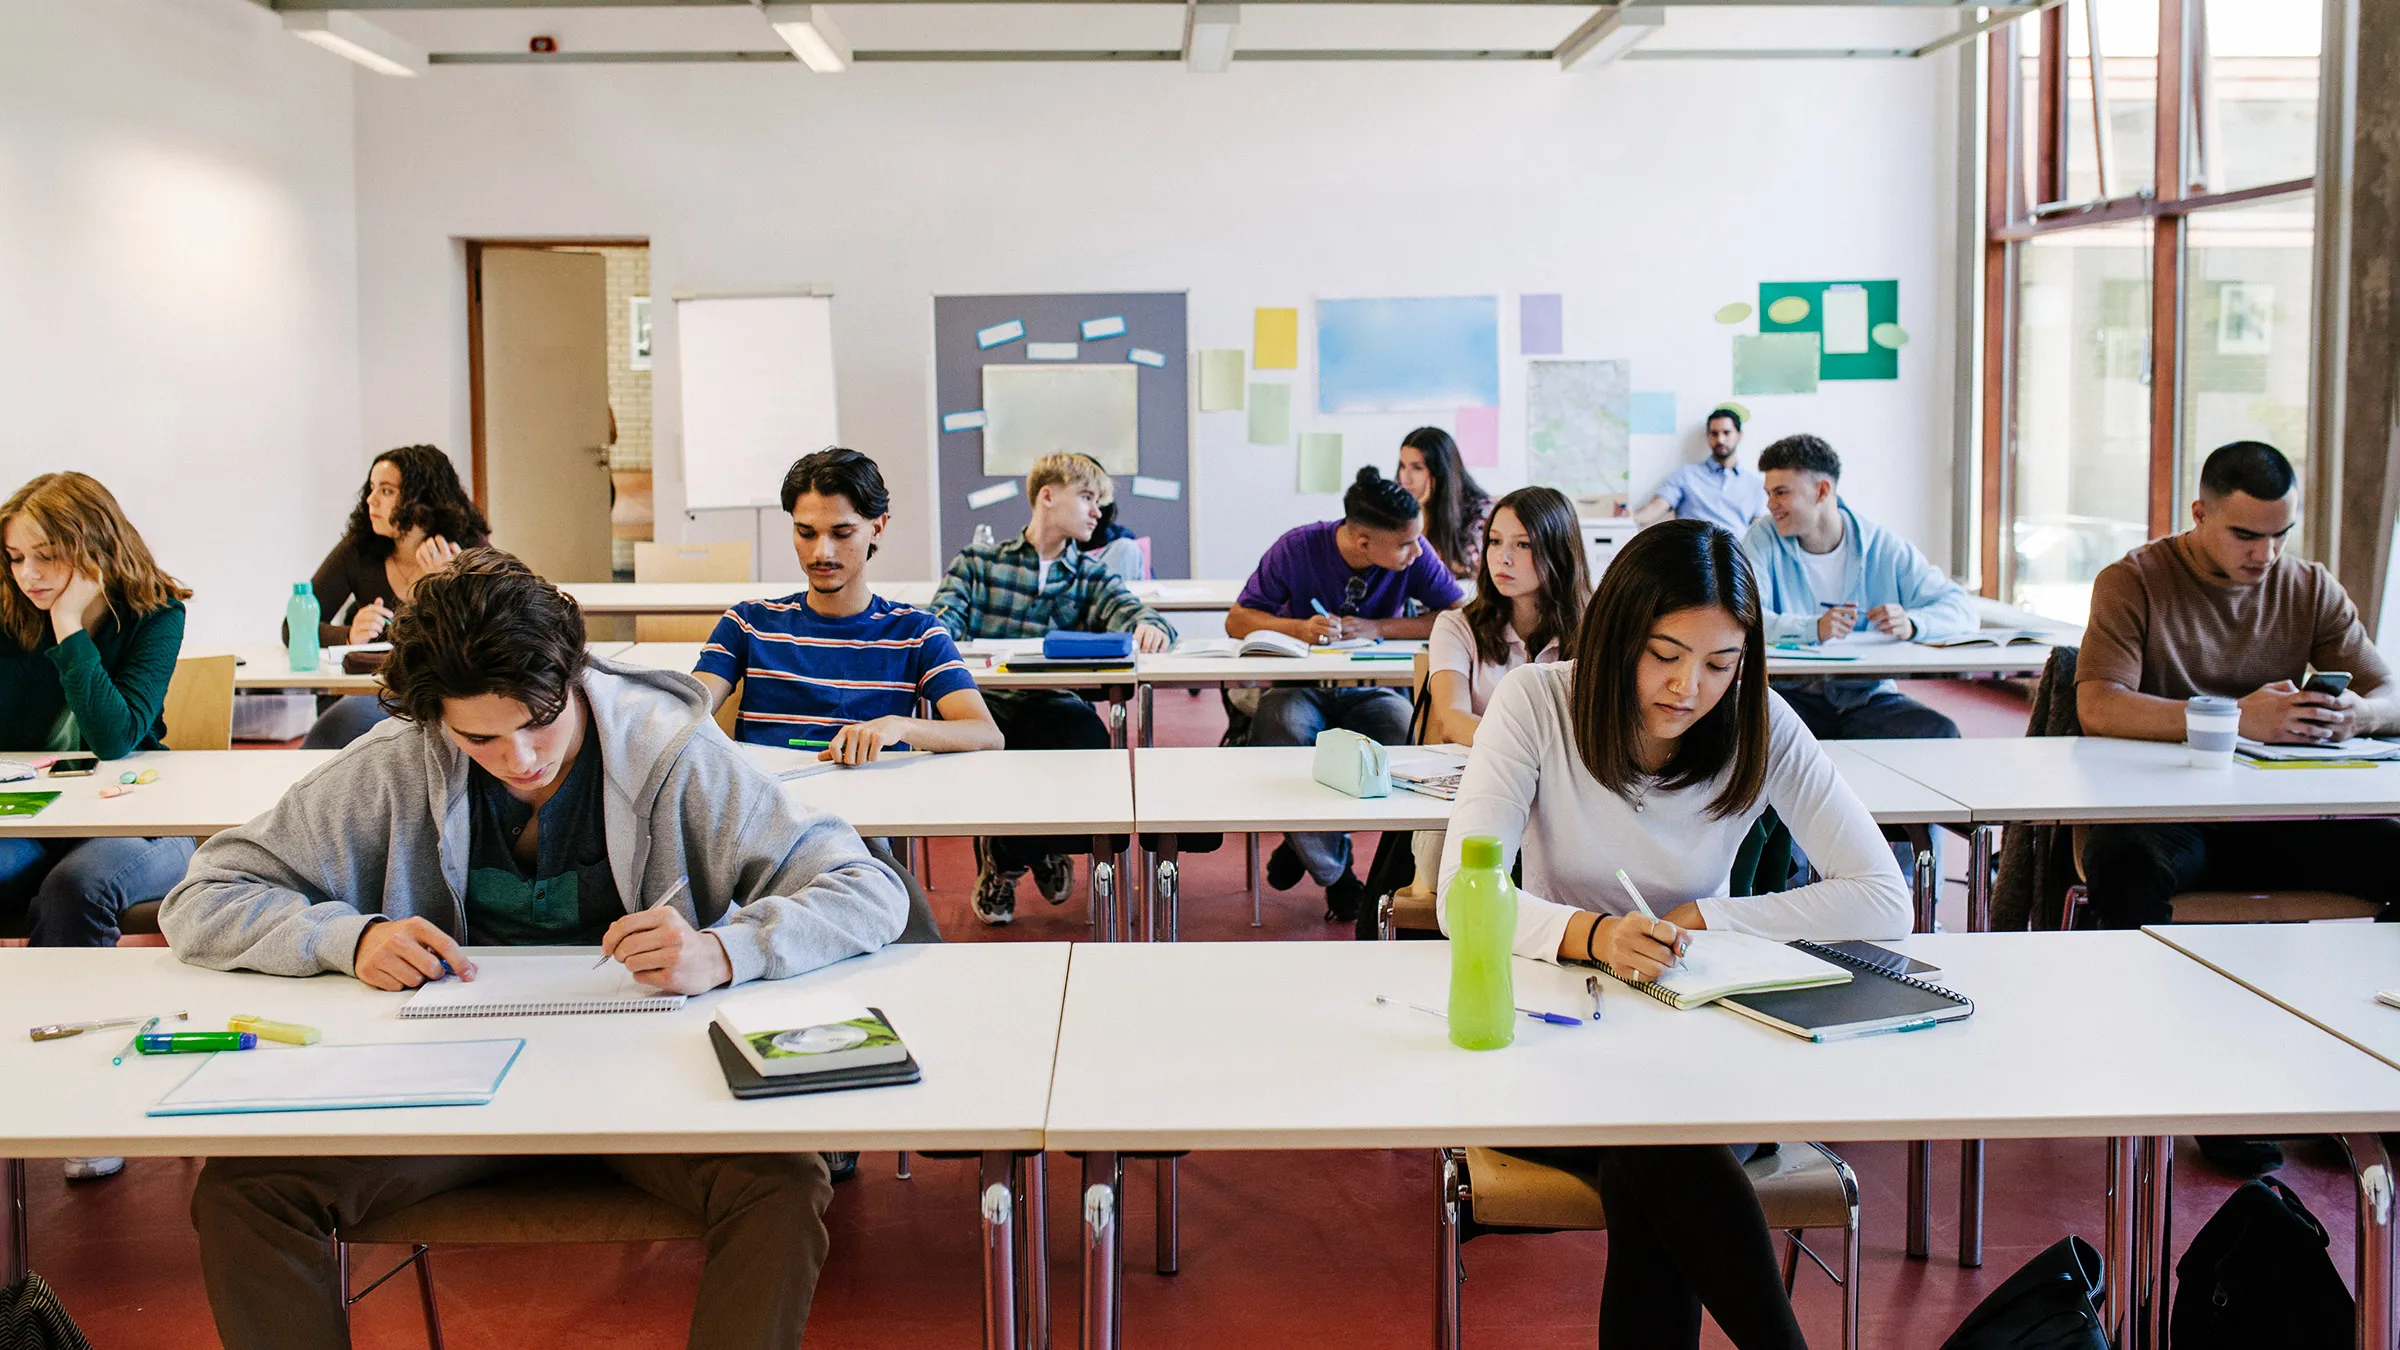



Dataset contains:

- Missing values (nulls): in some records (e.g., Attendance, Assignments, or Parent Education Level).
- Bias in grading (e.g., students with high attendance get slightly better grades).
- Imbalanced distributions (e.g., some departments having more students).



### Columns:

- **Student_ID**: Unique identifier for each student.  
- **First_Name**: Student’s first name.  
- **Last_Name**: Student’s last name.  
- **Email**: Contact email (can be anonymized).  
- **Gender**: Male, Female, Other.  
- **Age**: The age of the student.  
- **Department**: Student's department (e.g., CS, Engineering, Business).  
- **Attendance (%)**: Attendance percentage (0-100%).  
- **Midterm_Score**: Midterm exam score (out of 100).  
- **Final_Score**: Final exam score (out of 100).  
- **Assignments_Avg**: Average score of all assignments (out of 100).  
- **Quizzes_Avg**: Average quiz scores (out of 100).  
- **Participation_Score**: Score based on class participation (0-10).  
- **Projects_Score**: Project evaluation score (out of 100).  
- **Total_Score**: Weighted sum of all grades.  
- **Grade**: Letter grade (A, B, C, D, F).  
- **Study_Hours_per_Week**: Average study hours per week.  
- **Extracurricular_Activities**: Whether the student participates in extracurriculars (Yes/No).  
- **Internet_Access_at_Home**: Does the student have access to the internet at home? (Yes/No).  
- **Parent_Education_Level**: Highest education level of parents (None, High School, Bachelor's, Master's, PhD).  
- **Family_Income_Level**: Low, Medium, High.  
- **Stress_Level (1-10)**: Self-reported stress level (1: Low, 10:
High).  
- **Sleep_Hours_per_Night**: Average hours of sleep per night.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')


# **Step 1: Load the dataset and explore its structure.**

In [ ]:
df = pd.read_csv(r'/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv',sep=',',encoding='utf-8')
df.head()

In [ ]:
# Show dataset info
print(df.info())

In [ ]:
# Check for missing values
print(df.isnull().sum())

# **Step 2: Handle missing values and perform basic data cleaning.**

In [ ]:
df_cleaned = df.dropna()

In [ ]:
df.columns

In [ ]:
print("Number of duplicate rows:", df_cleaned.duplicated().sum())

In [ ]:
# Remove duplicates if found
df_cleaned = df_cleaned.drop_duplicates()

In [ ]:
print(df_cleaned.info())

# **Step 3: Conduct exploratory data analysis (EDA) using visualizations.**

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Total_Score'], bins=20, kde=True, color='blue')
plt.title("Distribution of Final Exam Grades")
plt.xlabel("Final_Score")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_cleaned['Study_Hours_per_Week'], y=df_cleaned['Total_Score'], color='green')
plt.title("Relationship Between Study Hours and Final Grade")
plt.xlabel("Study Hours")
plt.ylabel("Final Grade")
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df_cleaned['Study_Hours_per_Week'], y=df_cleaned['Total_Score'], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.title("Regression Line: Study Hours vs. Final Grade")
plt.xlabel("Study Hours")
plt.ylabel("Final_Score")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Gender'], y=df_cleaned['Total_Score'], palette="coolwarm")
plt.title("Final Grades Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Final_Score")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['Stress_Level (1-10)'], y=df_cleaned['Total_Score'], palette="coolwarm")
plt.title("Final Grades Distribution Across Semesters")
plt.xlabel("Stress")
plt.ylabel("Final Grade")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Sleep_Hours_per_Night'], y=df_cleaned['Grade'], palette="pastel")
plt.title("Final Grades Based on Study Habits")
plt.xlabel("Study Hours")
plt.ylabel("Final Grade")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))

sns.countplot(x="Family_Income_Level", hue="Grade", data=df, palette="Set3")

plt.title("Family Income Level vs. Grades", fontsize=14, fontweight="bold")
plt.xlabel("Family Income Level", fontsize=12)
plt.ylabel("Count of Students", fontsize=12)

plt.figtext(0.5, -0.1,
            "Insight:  most high-performance students come from low- and medium-income families. ",
            ha="center", fontsize=10, color="gray")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

my_circle = plt.Circle((0, 0), 0.7, color='white')

income_counts = df['Family_Income_Level'].value_counts()

plt.pie(income_counts,
        labels=income_counts.index,  
        colors=['lightgreen', 'lightblue', 'lightsalmon'],  
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 3, 'edgecolor': 'white'})  

p = plt.gcf()
p.gca().add_artist(my_circle)


plt.legend(title="Income Levels")
plt.title("Distribution of Family Income Levels", fontsize=14, fontweight='bold')
plt.figtext(0.5, -0.001,
            "Insight: High-income families are a minority. ",
            ha="center", fontsize=10, color="gray")


plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Study_Hours_per_Week'], y=df_cleaned['Grade'], palette="magma")
plt.title("Final Grades Based on Peak Study Time")
plt.xlabel("Peak Study Time")
plt.ylabel("Final Grade")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Age'], y=df['Stress_Level (1-10)'], label="Stress Level", marker='o', color='b', linewidth=2.5)
sns.lineplot(x=df['Age'], y=df['Sleep_Hours_per_Night'], label="Sleep Hours per Night", marker='s', color='r', linewidth=2.5)

plt.xlabel("Age", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title("Stress Level and Sleep Hours Over Age", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Metrics", title_fontsize=12, fontsize=10, loc='upper right')

plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Parent_Education_Level'], y=df['Total_Score'], palette='mako')
plt.title("Parent Education Level vs. Student Performance")
plt.show()

In [ ]:
df['Study_Hours_per_Week_bins'] = pd.cut(df['Study_Hours_per_Week'], 
                                         bins=[0, 5, 10, 15, 20, 25, 30, df['Study_Hours_per_Week'].max() + 1], 
                                         labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+'], 
                                         include_lowest=True)

df['Study_Hours_per_Week_bins'].value_counts()

In [ ]:
plt.figure(figsize=(8, 5))
sns.pointplot(
    x='Study_Hours_per_Week_bins', 
    y='Final_Score', 
    data=df, 
    ci=None, 
    color='darkblue', 
    markers='o', 
    linestyles='dashed'
)
plt.title('Final Score by Study Hours per Week', fontsize=14, fontweight='bold', color='darkred')
plt.xlabel('Study Hours per Week (Binned)', fontsize=12)
plt.ylabel('Final Score', fontsize=12)
plt.xticks(rotation=45)  
plt.yticks()
plt.grid(True, linestyle='--', alpha=0.6)  # Light grid for better readability
plt.show()

# **Feature Engineering & Scaling.**

In [ ]:
df_cleaned['Grade Improvement'] = df_cleaned['Final_Score'] - df_cleaned['Midterm_Score']

In [ ]:
# Convert categorical variables to lowercase
df_cleaned['Gender'] = df_cleaned['Gender'].str.lower()

In [ ]:
df_cleaned['Attendance Category'] = pd.cut(df_cleaned['Attendance (%)'], bins=[0, 50, 80, 100], labels=['Low', 'Medium', 'High'])

In [ ]:
df_cleaned['Study Efficiency'] = df_cleaned['Final_Score'] / (df_cleaned['Study_Hours_per_Week'] + 1)

In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Gender', 'Attendance Category'], drop_first=True)

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
scaler_minmax = MinMaxScaler()
df_encoded[numeric_cols] = scaler_minmax.fit_transform(df_encoded[numeric_cols])

In [ ]:
scaler_standard = StandardScaler()
df_encoded[numeric_cols] = scaler_standard.fit_transform(df_encoded[numeric_cols])

In [ ]:
print(df_encoded.head())

# **Step 4: Identify correlations and patterns in student performance.**

In [ ]:
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

2- **T- Test**


A T-Test is a statistical test used to compare the means (averages) of two groups and determine if the difference between them is statistically significant. It helps answer:

"Is the difference in means real, or is it just due to random chance?"
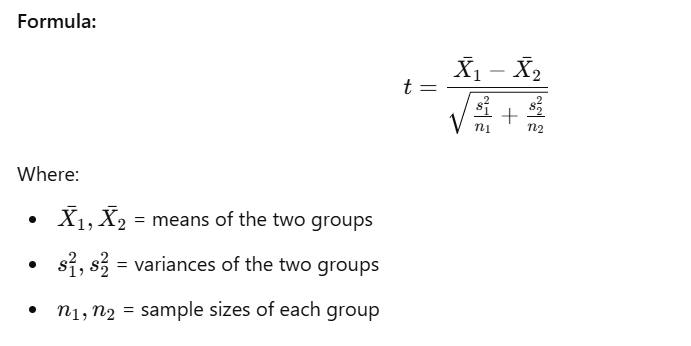

- p-value < 0.05 → 🚀 Significant difference
- p-value ≥ 0.05 → ❌ No significant difference

In [ ]:
from scipy.stats import ttest_ind

male_grades = df_cleaned[df_cleaned['Gender'] == 'Male']['Total_Score']
female_grades = df_cleaned[df_cleaned['Gender'] == 'Female']['Total_Score']

# Perform t-test
t_stat, p_value = ttest_ind(male_grades, female_grades)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in grades between male and female students.")
else:
    print("There is no statistically significant difference in grades between male and female students.")


# Step 5: Present Findings

1- **Key Findings :**


**Students who study more hours per week between (21-25) tend to have higher Total Scores.**

1️⃣ Students who study between 11-15 and 21-25 hours per week achieve the highest final scores (~70+)

This suggests that a balanced study routine (not too little or too much) is effective for better performance.

2️⃣ Students who study very little (0-5 hours) have the lowest final scores (~65-66)

This indicates that insufficient study time negatively impacts final scores.

3️⃣ After 21-25 hours, performance slightly drops

The final score decreases slightly for the 26-30 hours group.
This suggests that overstudying beyond a certain limit may not necessarily lead to better scores.


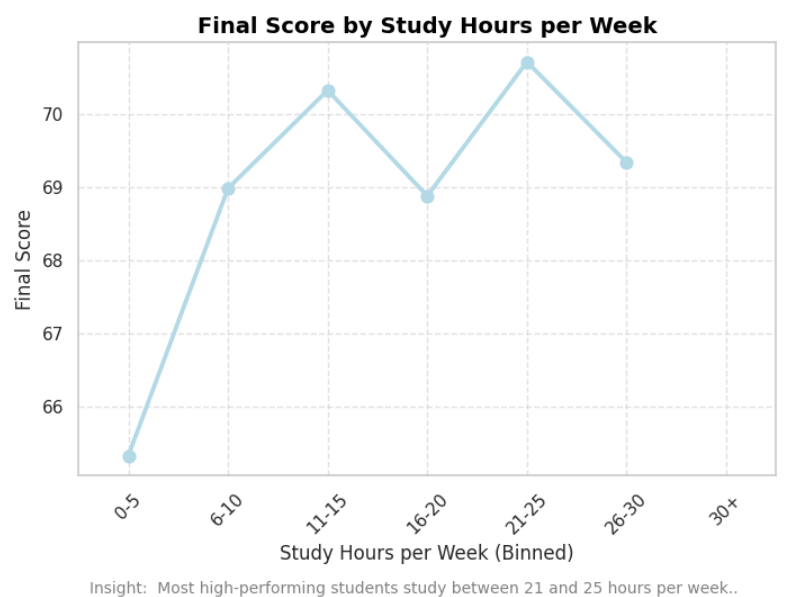




**Students with higher parental education levels tend to score higher.**

1️⃣ Students whose parents have a PhD tend to achieve higher grades

The highest count of A-grade students belongs to the PhD category (orange bars).
A large portion of students scoring B, C, and D also have parents with a PhD.
This suggests that higher parental education may positively influence student performance.

2️⃣ Parental education beyond high school (PhD, Master’s, Bachelor's) leads to better performance

The High School category has a relatively low count of A and B grades compared to the other categories.
This suggests that students whose parents have lower education levels are more likely to score lower.

3️⃣ Students with parents having a Master’s or Bachelor's degree show a balanced grade distribution

These groups have a more even distribution of grades, meaning that parental education at these levels does not guarantee an A, but it still supports better performance than High School.

4️⃣ High school-educated parents have a higher percentage of students scoring lower grades

There is a noticeable presence of F and D grades in this category.


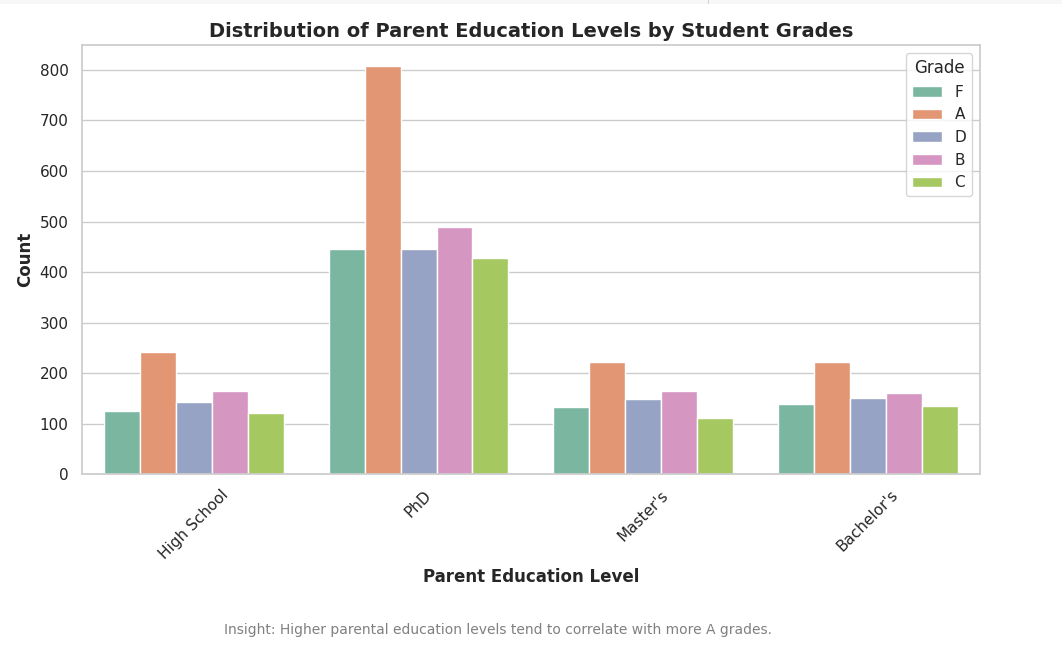



***Students with higher attendance percentages tend to have higher total scores.***

1️⃣ Students with an 'A' grade have the highest attendance

The median attendance for 'A' students is around 90%.
The interquartile range (IQR) is high, indicating that most students in this group attend frequently.

2️⃣ Students with lower grades ('D' and 'F') have lower attendance

'F' students have a median attendance of around 70%, with some attending as low as 50%.
'D' students have a similar distribution to 'F', showing that attendance decreases with performance.

3️⃣ Students with a 'B' grade also have relatively high attendance

Median attendance is above 80%, but slightly lower than 'A' students.

4️⃣ C grade students show moderate attendance

Their median attendance is around 65-70%, showing variability in performance.


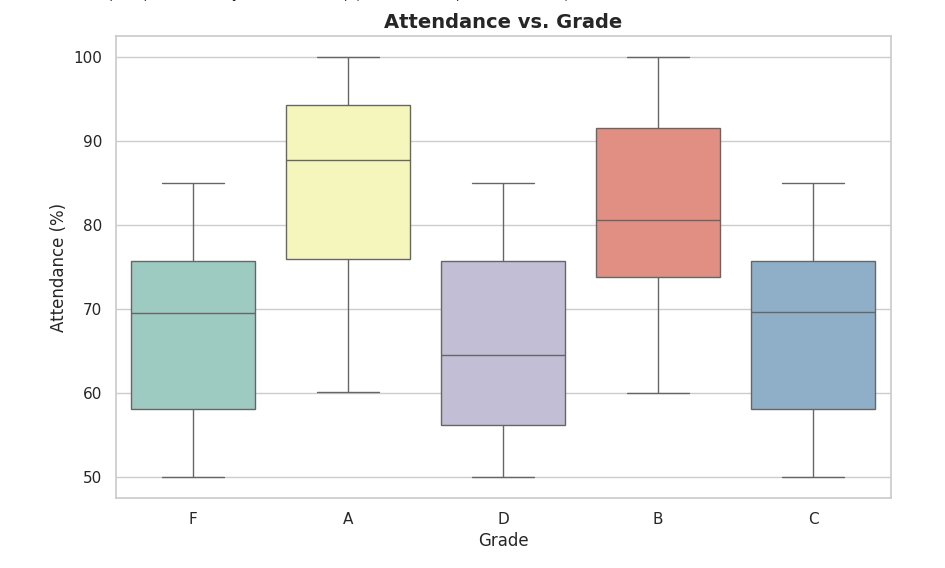

**Moderate Stress Leads to Better Performance**


1️⃣ Optimal stress level for performance?

A moderate level of stress (5) might be beneficial, pushing students to stay motivated and perform better.
Too little stress (1-3) might lead to lack of motivation, while too much stress (8-10) might cause burnout and negatively impact performance.

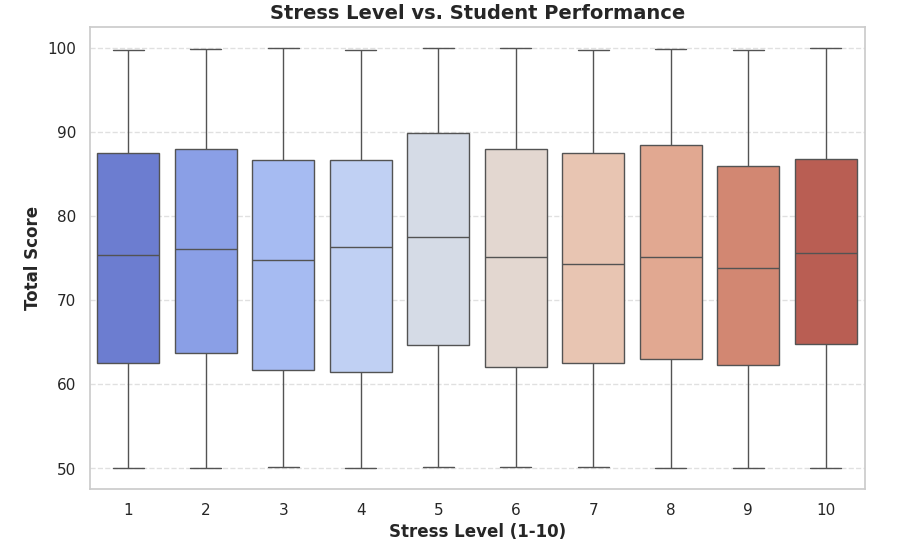

**Students with Internet Access Perform Better**

1️⃣ Students with Internet Access at Home Perform Better

A significantly higher number of students with internet access at home achieve higher grades (A, B, and C) compared to those without internet.
This suggests that internet access plays a crucial role in academic performance, likely due to easier access to study materials, research, and online resources.

2️⃣ Students Without Internet Access Struggle More

The number of students without internet access is relatively low across all grades, but a noticeable proportion of them receive lower grades (F and D) compared to those with internet.
This indicates that lack of internet access may be a disadvantage, potentially limiting access to educational materials, online assignments, and research opportunities.

3️⃣ Grade ‘A’ Has the Highest Internet Users

The largest group of students with internet access falls in the A grade category, reinforcing the idea that students who can utilize online resources tend to perform better.

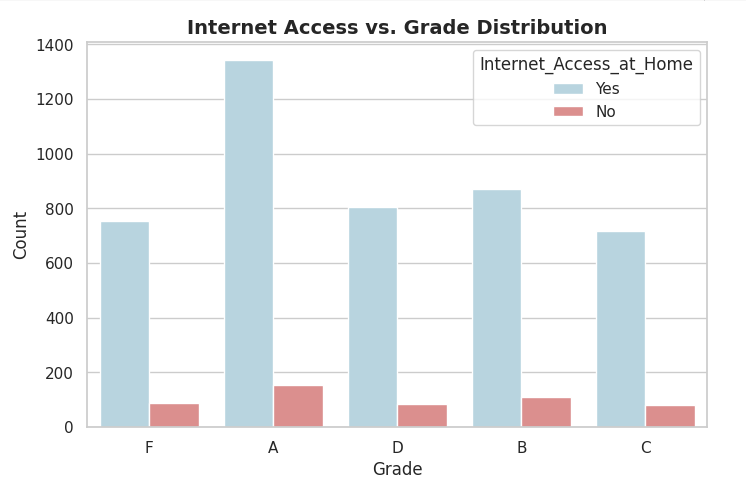

**The following factors were analyzed and found to have no significant impact on student performance :**

- First Name
- Last_Name
- Emai
- Gender
- Age
- Final Score
- Midterm Score
- Project Score
- Department
- Student_ID
- Assignments Avg
- Quizzes Avg

2- **Summary of Key Recommendations**

- Ensure balanced study habits (11-25 hours per week) and adequate sleep (7-9 hours per night).
- Provide digital access and additional support for students lacking internet at home.
- Help students manage stress effectively to optimize learning.
- Promote structured extracurricular involvement without compromising academic performance.
- Monitor and improve attendance rates with engagement programs.
- Increase parental engagement for students whose parents have lower education levels.

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Attendance (%)'], y=df_cleaned['Grade'] , palette="viridis")
plt.title("Impact of Attendance on Final Grades")
plt.xlabel("Attendance Level")
plt.ylabel("Final_Score")
plt.show()

# **PCA for Dimensionality Reduction**

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded[numeric_cols])

df_encoded['PCA1'] = pca_result[:, 0]
df_encoded['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_encoded['PCA1'], y=df_encoded['PCA2'], hue=df_cleaned['Total_Score'], palette="coolwarm", alpha=0.7)
plt.title("PCA: Student Distribution Based on Key Factors")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# **Machine Learning Models**

# **Clustering Analysis (K-Means)**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded[numeric_cols])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_encoded['PCA1'], y=df_encoded['PCA2'], hue=df_encoded['Cluster'], palette="Set1", alpha=0.7)
plt.title("K-Means Clustering: Student Performance Groups")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# **Predicting Final Grades Using Linear Regression**

In [ ]:
X = df_cleaned[numeric_cols].drop(columns=['Final_Score'])
y = df_cleaned['Final_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict final grades
y_pred = model.predict(X_test)

# Evaluate model performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# **Feature Importance using Random Forest**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")
plt.title("Feature Importance Using Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# **Predicting Dropout Risk (Random Forest Classifier)**

In [ ]:
df_encoded['Dropout Risk'] = (df_cleaned['Total_Score'] < 50).astype(int)

X_class = df_encoded[numeric_cols]
y_class = df_encoded['Dropout Risk']
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred_class = clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))